In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv(r"C:\Users\modyr\Desktop\Youtube Analysis\Youtube_Data_Analysis\yt_data.csv")

df.head(2)


,video_id,title,description,published_at,channel_id,channel_title,category_id,tags,duration,definition,caption,view_count,like_count,dislike_count,favorite_count,comment_count
0,wsCmWZSASes,"Tank vs Roach FIGHT HIGHLIGHTS: March 1, 2025 ...",Gervonta Davis and Lamont Roach fought an epic...,2025-03-02T06:35:42Z,UCWXYAGB9SadlL6p5Bb66wWw,Premier Boxing Champions,17,"['Boxing', 'Gervonta Davis', 'Gervonta Davis v...",PT3M22S,hd,False,2486351,23841,0,0,6725
1,mS8W6NY6QjQ,FULL SEGMENT: John Cena SELLS OUT and ruthless...,After Undisputed WWE Champion Cody Rhodes emph...,2025-03-02T05:03:43Z,UCJ5v_MCY6GNUBTO8-D3XoAg,WWE,17,"['Cody Rhodes', 'John Cena', 'The Rock', 'Trav...",PT17M23S,hd,True,3695350,136355,0,0,23592


-   Now, let's identify videos with highest view count by channel name

In [2]:
df.columns

Index(['video_id', 'title', 'description', 'published_at', 'channel_id',
       'channel_title', 'category_id', 'tags', 'duration', 'definition',
       'caption', 'view_count', 'like_count', 'dislike_count',
       'favorite_count', 'comment_count'],
      dtype='object')

In [37]:
top_10_viewed = df.pivot_table(index=['title', 'channel_title'], values='view_count', aggfunc='sum').sort_values('view_count', ascending=False).head(10)
top_10_viewed = top_10_viewed.reset_index()
top_10_viewed['view_count'] = pd.to_numeric(top_10_viewed['view_count'])

top_10_viewed

,title,channel_title,view_count
0,I Spent 100 Hours Inside The Pyramids!,MrBeast,149932178
1,Kendrick Lamar's Apple Music Super Bowl Halfti...,NFL,93689528
2,100 People Trapped Inside 100 Circles For $500...,MrBeast,35957561
3,G-DRAGON - TOO BAD (feat. Anderson .Paak) (Off...,OfficialGDRAGON,27410660
4,"JENNIE, Doechii - ExtraL (Official Video)",JennieRubyJaneVEVO,23043665
5,"Karan Aujla, OneRepublic, Disha Patani, Ikky -...",Karan Aujla,22287709
6,A Minecraft Movie | Final Trailer,Warner Bros.,20447774
7,HIT 3 Teaser : Sarkaar's Laathi | Nani | Saile...,Wall Poster Cinema,20182707
8,G-DRAGON - DRAMA (Official Video),OfficialGDRAGON,17591163
9,IS THIS THE BEST BRAWLER EVER?!,Brawl Stars,15008085


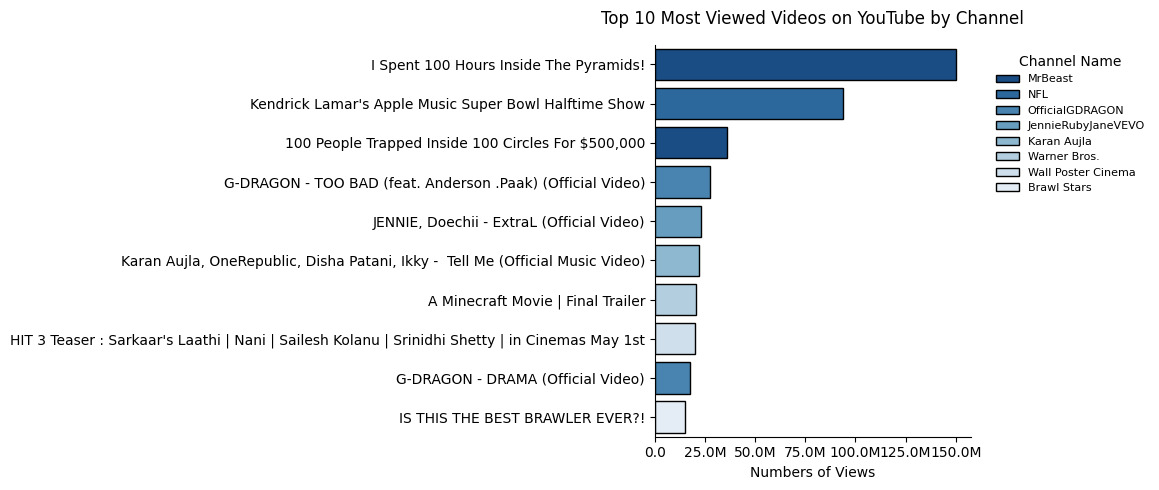

In [38]:
plt.figure(figsize=(12, 5))
sns.barplot(data=top_10_viewed, 
            x='view_count', 
            y='title',
            palette='Blues_r',
            edgecolor='k',
            hue='channel_title',
            #dodge=True,
            )

# Function to format the values
def num_format(x, pos):
    if x >= 1e6:
        return '{:1.1f}M'.format(x*1e-6)
    elif x >= 1e3:
        return '{:1.1f}K'.format(x*1e-3)
    else:
        return '{:1.1f}'.format(x)

# Applying the custom formatter to the x-axis
plt.gca().xaxis.set_major_formatter(FuncFormatter(num_format))

plt.title('Top 10 Most Viewed Videos on YouTube by Channel', pad=15)
plt.xlabel('Numbers of Views')
plt.ylabel('')
plt.legend(title='Channel Name', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8, title_fontsize=10, frameon=False)

sns.despine()
plt.tight_layout()
plt.show()

**Key Insights:**

1. **MrBeast Dominates Viewer Engagement**:  
   - MrBeast holds **two of the top three most-viewed videos**, with "I Spent 100 Hours Inside The Pyramids!" securing the **#1 spot** (~150M views) and another challenge-based video ranking third (~40M views). This highlights the effectiveness of high-concept, immersive challenges in driving massive engagement.

2. **Live Events & Sports Content Attract Massive Audiences**:  
   - The NFL’s Super Bowl Halftime Show featuring Kendrick Lamar ranks **second** (~90M views), underscoring the power of live-event coverage and partnerships with popular artists to capture viral attention.

3. **K-Pop and Music Content Reign Supreme**:  
   - Multiple entries from **G-DRAGON** (OfficialGDRAGON channel) and **Jennie** (JennieRubyJaneVEVO) demonstrate the global reach of K-pop and music videos. Official releases remain a cornerstone of YouTube’s top content.

4. **Diverse Content Types Compete Effectively**:  
   - Beyond challenges and music, **gaming** (Brawl Stars), **movie trailers** (Warner Bros.’ *Minecraft Movie*), and **Hindi cinema** (Karan Aujla) showcase YouTube’s broad appeal. This diversity indicates opportunities for niche creators to break into mainstream viewership.


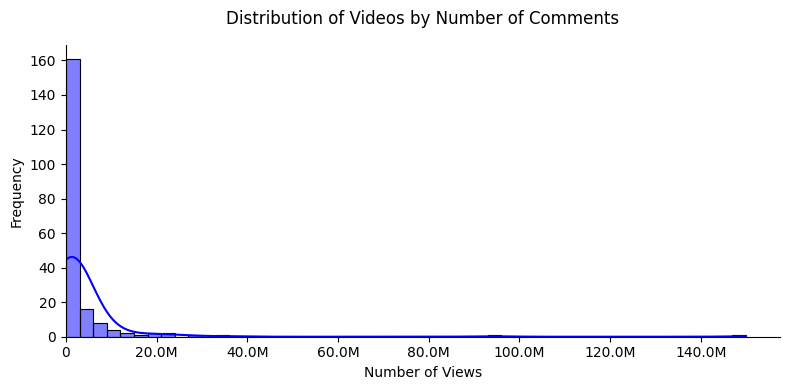

In [36]:
# videos distribution by views
plt.figure(figsize=(8, 4))

sns.histplot(data=df,
             x='view_count',
             bins=50,
             kde=True,
             edgecolor='k',
             color='blue'
             
)

# Function to format the values
def num_format(x, pos):
    if x >= 1e6:
        return '{:1.1f}M'.format(x*1e-6)
    elif x >= 1e3:
        return '{:1.0f}K'.format(x*1e-3)
    else:
        return '{:1.0f}'.format(x)

# Applying the custom formatter to the x-axis
plt.gca().xaxis.set_major_formatter(FuncFormatter(num_format))

plt.title('Distribution of Videos by Number of Comments', pad=15)
plt.ylabel('Frequency')
plt.xlabel('Number of Views')

plt.grid(False)
plt.xlim(0, None)
sns.despine()
plt.tight_layout()
plt.show()

**Key Insights:**  

1. **Highly Skewed Engagement Distribution**:  
   - The chart reveals a **power-law distribution**, where **a tiny fraction of videos garner the majority of views**. The first bar (likely representing videos with <5M views) dominates (~160 videos), while views plummet rapidly for higher-view ranges. This aligns with the "long-tail" phenomenon common in social media, where **most content receives minimal engagement**, and only outliers achieve viral success.  

2. **Viral Content Dominates Views**:  
   - A handful of videos (e.g., those in the 100M+ range) account for disproportionately high viewership. This echoes the earlier analysis of MrBeast and NFL content, reinforcing that **viral, high-concept videos** capture the lion’s share of attention.  
